<a href="https://colab.research.google.com/github/Hasifa1/Machine-learning-models/blob/main/All_algorithms_SUV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/SUV_Purchase.csv')

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.shape

(400, 5)

In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
#data preprocessing
from sklearn import preprocessing
LE=preprocessing.LabelEncoder()
#fitting the technique to dataset
df.Gender=LE.fit_transform(df.Gender)

**Visualisation**

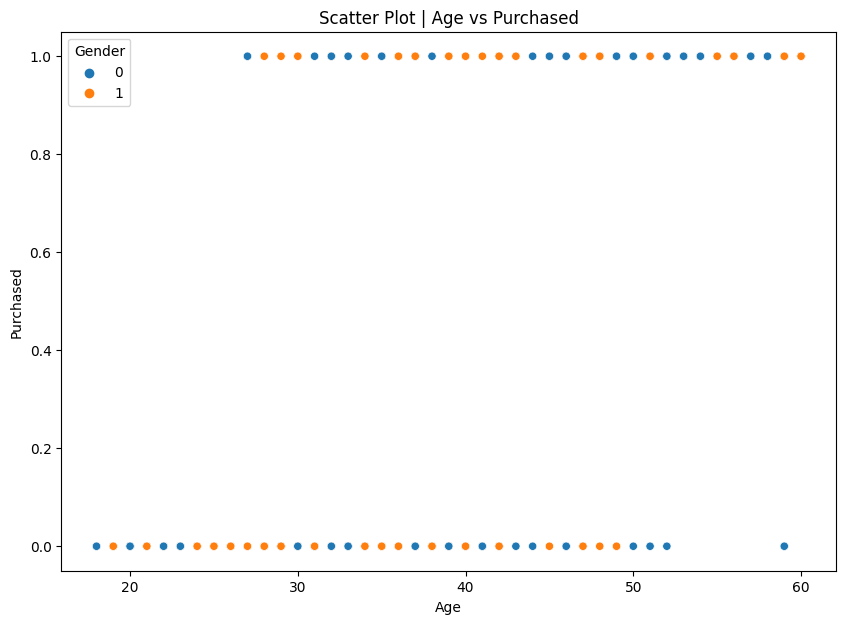

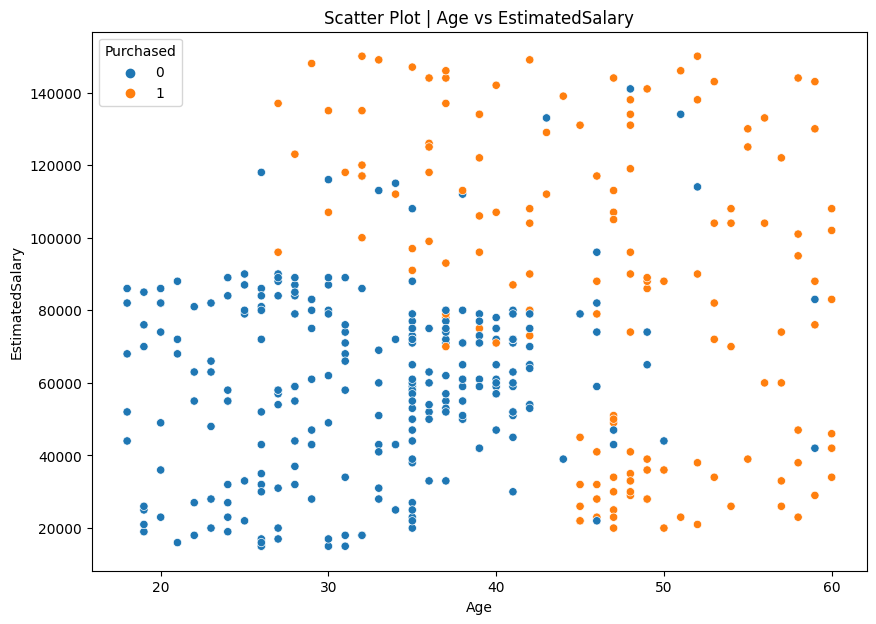

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_vs(frame,col1,col2,hue):
  plt.figure(figsize=(10,7))
  sns.scatterplot(data=frame,x=col1,y=col2,hue=hue)
  plt.title(f"Scatter Plot | {col1} vs {col2}")
plot_vs(df,'Age','Purchased','Gender')
plot_vs(df,'Age','EstimatedSalary','Purchased')

In [ ]:
df=df.drop(['User ID','Gender'],axis=1)

In [ ]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
#X -Independent variables
#Y- Dependent variable  -output
#for feeding ml model we need to feed 2D only
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1:].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
#normalize
from sklearn.preprocessing import StandardScaler
sst=StandardScaler()
X_train=sst.fit_transform(X_train)#normalizing
X_test=sst.transform(X_test)

**Guassian NB**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [ ]:
gnb.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
y_pred=gnb.predict(X_test)

In [ ]:
nb_traccuracy=gnb.score(X_train,Y_train)
print(nb_traccuracy)

0.865625


In [ ]:
nb_accuracy=gnb.score(sst.transform(X),Y)
print(nb_accuracy)

0.88


**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
lnr=LinearRegression()

In [ ]:
lnr.fit(X_train,Y_train)

LinearRegression()

In [ ]:
y_pred=lnr.predict(X_test)

In [ ]:
lnr_acc=lnr.score(X_train,Y_train)
lnr_acc

0.4323639630435133

In [ ]:
lnr_acc=lnr.score(sst.transform(X),Y)
lnr_acc

0.45838123361349836

**LOGISTIC regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()

In [ ]:
lgr.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred=lgr.predict(X_test)

In [ ]:
lgr_acc=lgr.score(X_train,Y_train)
lgr_acc

0.840625

In [ ]:
lgr_acc=lgr.score(sst.transform(X),Y)
lgr_acc

0.845

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn_clf.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=2)

In [ ]:
y_pred=knn_clf.predict(X_test)

In [ ]:
knn_acc=knn_clf.score(X_train,Y_train)
knn_acc

0.915625

In [ ]:
knn_acc=knn_clf.score(sst.transform(X),Y)
knn_acc

0.905

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=dt.predict(X_test)

In [ ]:
dt_acc=dt.score(X_train,Y_train)
dt_acc

0.996875

In [ ]:
dt_acc=dt.score(sst.transform(X),Y)
dt_acc

0.965

**RandomForest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [ ]:
rf.fit(X_train,Y_train)

<ipython-input-56-70917fd5b97b>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,Y_train)


RandomForestClassifier()

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
rf_acc=rf.score(X_train,Y_train)
rf_acc

0.996875

In [ ]:
rf_acc=rf.score(sst.transform(X),Y)
rf_acc

0.9725

**Deployment**

In [ ]:
age=int(input())
estimatedsal=int(input())
#inputs=sst.transform([[age,estimatedsal]])
op=rf.predict(sst.transform([[age,estimatedsal]]))
print(op)

22
300000
[1]
